<a href="https://colab.research.google.com/github/lorek/Probability_Course_Labs/blob/main/LAB_kolokwium_trening_sol.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Laboratorium z rachunku prawdopodobieństwa
## Zadania treningowe przed kolokwium zaliczeniowym




**Spacer losowy i prawo iterowanego logarytmu**


Rozważmy następujący prosty spacer losowy po osi liczbowej: umieszczamy pionek w punkcie 0, a następnie w każdym ruchu przesuwamy go losowo o 1 w prawo lub o 1 w lewo. Łącznie wykonujemy w ten sposób $n$ ruchów. Formalnie definiujemy taki spacer w następujący sposób. Niech $X_1,X_2,\ldots,X_n$ będą niezależnymi zmiennymi losowymi, takimi, że
$$
 \mathbb{P}(X_i=-1)=\mathbb{P}(X_i=1)=\frac{1}{2},\quad i=1,2,\ldots,n
$$
Zmienną losową $X_i$ interpretujemy jako zmianę pozycji pionka w $i$-tym kroku -- w skrócie będziemy ją nazywać **$i$-tym krokiem**. Wówczas
$$
 S_i=X_1+X_2+\ldots+X_i,\quad i=1,2,\ldots,n
$$
oznacza **pozycję** pionka po $n$ krokach. Ciąg $(S_1,S_2,\ldots)$ kolejnych pozycji nazywamy **trajektorią** spaceru losowego. Na gruncie teorii możemy rozważać nieskończone spacery losowe, tzn. przyjmować $n=\infty$. Takie nieskończone spacery losowe mają następującą własność.



**Twierdzenie (prawo iterowanego logarytmu).** Niech $S_1,S_2,\ldots$ będzie trajektorią nieskończonego prostego spaceru losowego. Wówczas
$$
 \limsup_{n\to\infty}\frac{S_n}{\sqrt{2n\log\log n}}=-\liminf_{n\to\infty}\frac{S_n}{\sqrt{2n\log\log n}}=1\quad{\rm z\ prawdopodobieństwem\ 1}.
$$
Tutaj $\log$ oznacza logarytm naturalny. Sprawdzimy działanie prawa iterowanego logarytmu na skończonym spacerze losowym.


W poniższych zadaniach powinno się używać bibliotek:

```python
import numpy as np
import matplotlib.pyplot as plt
```


In [ ]:
import numpy as np
import matplotlib.pyplot as plt



**Zadanie 1.** Wylosuj 30 razy po $n=200$ kroków spaceru losowego i zapisz je w macierzy `numpy.ndarray` z 200 wierszami i 30 kolumnami, tj. rozmiaru (200,30)

*Przytatne funkcje i parametry*: `np.choice()`




In [ ]:
# Definiujemy parametry
n = 200  # liczba kroków
num_walks = 30  # liczba spacerów

# Generujemy losowe kroki (-1 lub 1) dla każdego spaceru
random_walks = np.random.choice([-1, 1], size=(n, num_walks))

# Wyświetlamy pierwsze kilka wierszy macierzy
print(random_walks[:5])
print(type(random_walks))

[[-1 -1  1  1  1 -1 -1  1  1 -1  1 -1 -1 -1 -1 -1  1 -1 -1 -1  1 -1  1 -1
  -1 -1 -1  1  1  1]
 [-1  1  1  1 -1  1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1 -1  1  1  1 -1  1 -1  1
  -1 -1  1 -1  1  1]
 [ 1  1  1 -1 -1  1  1 -1 -1 -1 -1  1  1 -1 -1  1  1 -1 -1 -1 -1  1  1 -1
  -1 -1  1  1 -1  1]
 [ 1  1  1 -1  1 -1 -1  1  1 -1  1 -1 -1  1  1  1  1  1 -1 -1 -1  1 -1 -1
  -1  1 -1 -1  1 -1]
 [ 1  1  1 -1 -1 -1  1  1 -1  1  1 -1 -1 -1 -1  1 -1  1 -1 -1 -1  1 -1 -1
  -1  1  1  1  1  1]]
<class 'numpy.ndarray'>



**Zadanie 2.** Wykorzystaj kroki spacerów losowych z utworzonej macierzy numpy do obliczenia trajektorii. Wynikiem powinna być macierz numpy, zawierająca w każdej z 30 kolumn trajektorię jednego spaceru losowego długości $n=200$.

*Przydatne funkcje*: `cumsum()`



In [ ]:
# Obliczamy trajektorie poprzez sumowanie skumulowane kroków
trajectories = np.cumsum(random_walks, axis=0)

# Wyświetlamy pierwsze kilka wierszy trajektorii
print(trajectories[:5])

[[-1 -1  1  1  1 -1 -1  1  1 -1  1 -1 -1 -1 -1 -1  1 -1 -1 -1  1 -1  1 -1
  -1 -1 -1  1  1  1]
 [-2  0  2  2  0  0 -2  0  0 -2  0 -2  0 -2 -2 -2  0  0  0  0  0  0  0  0
  -2 -2  0  0  2  2]
 [-1  1  3  1 -1  1 -1 -1 -1 -3 -1 -1  1 -3 -3 -1  1 -1 -1 -1 -1  1  1 -1
  -3 -3  1  1  1  3]
 [ 0  2  4  0  0  0 -2  0  0 -4  0 -2  0 -2 -2  0  2  0 -2 -2 -2  2  0 -2
  -4 -2  0  0  2  2]
 [ 1  3  5 -1 -1 -1 -1  1 -1 -3  1 -3 -1 -3 -3  1  1  1 -3 -3 -3  3 -1 -3
  -5 -1  1  1  3  3]]



**Zadanie 3.** Narysuj wykresy dwóch funkcji $f(x)=\sqrt{2x\log\log x}$ oraz $g(x)=-f(x)$. Skala na osi $X$ powinna przebiegać od 0 do 200. Skalę na osi $Y$ dobierz optymalnie do wartości obu funkcji. Wykresy powinny być narysowane czarną linią przerywaną grubości 2.

*Przydatne funkcje i argumenty*: `plt.plot(), np.sqrt(), np.log(), plt.xlim(), plt.ylim(), plt.legend(), np.e`




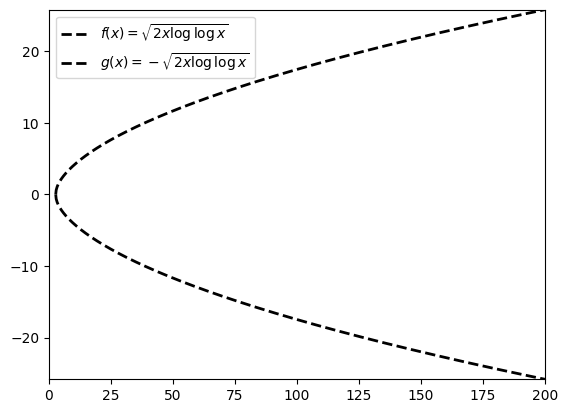

In [ ]:

x = np.linspace(np.e, 200, 1000)

y_f = np.sqrt(2 * x * np.log(np.log(x)))
y_g = -y_f

# Rysowanie wykresów
plt.plot(x, y_f, 'k--', linewidth=2, label=r'$f(x) = \sqrt{2x\log\log x}$')
plt.plot(x, y_g, 'k--', linewidth=2, label=r'$g(x) = -\sqrt{2x\log\log x}$')

# Ustawienia osi
plt.xlim(0, 200)
plt.ylim(min(y_g), max(y_f))

# Dodanie legendy
plt.legend()

# Wyświetlanie wykresu
plt.show()


**Zadanie 3,5.** Zastanów się, dlaczego przy tworzeniu wykresów wyświetla się (może zależeć od Twojego wyboru wartości na osi $X$) komunikat ostrzegawczy. Dla jakich $x$ funkcje $f(x)$ i $g(x)$ są dobrze zdefiniowane?



**Zadanie 4.** Dorysuj do wykresu wykresy liniowe dla wszystkich 30 trajektorii spacerów losowych. Użyj funkcjii `plt.cm.rainbow()` do zdefiniowana 30 kolorów -- jednego dla każdej trajektorii. Ustaw poziom krycia `alpha` tak, aby wykresy funkcji narysowane w poprzednim zadaniu pozostały wyraźne. Trajektorie powinny być narysowane liniami ciągłymi grubości 1.

*Przydatne funkcje i argumenty*:  np.linspace(), plt.plot(), plt.legend(), plt.show(), plt.cm.rainbow()`

```python
# Kolory dla trajektorii definiujemy następująco:
colors = plt.cm.rainbow(np.linspace(0, 1, num_walks)) #tutaj: num_walks=30
```


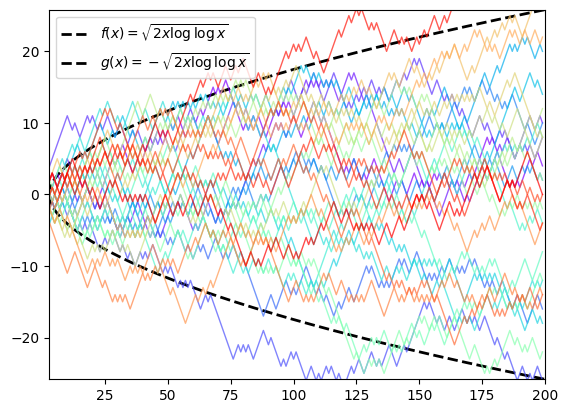

In [ ]:
# Rysowanie wykresów funkcji
plt.plot(x, y_f, 'k--', linewidth=2, label=r'$f(x) = \sqrt{2x\log\log x}$')
plt.plot(x, y_g, 'k--', linewidth=2, label=r'$g(x) = -\sqrt{2x\log\log x}$')

# Ustawienia osi
plt.xlim(np.e, 200)
plt.ylim(min(y_g), max(y_f))

# Dodanie legendy
plt.legend()

# Kolory dla trajektorii
colors = plt.cm.rainbow(np.linspace(0, 1, num_walks))

# Rysowanie trajektorii spacerów losowych
for i in range(num_walks):
    plt.plot(trajectories[:, i], color=colors[i], alpha=0.7, linewidth=1)

# Wyświetlanie wykresu
plt.show()


## Rozkład wykładniczy i gamma




Zmienna losowa $X$ o rozkładzie wykładniczym z parametrem **intenstywności** $\lambda>0$ ma gęstość i dystrybuantę:
$$f(x)=\lambda e^{-\lambda x}, \quad F(x)=1-e^{-\lambda x}, \qquad x\geq 0.$$


Zmienna losowe $Y$ ma rozkład Gamma z parametrami **kształtu** (shape) $\alpha$ oraz **skali** (scale) $\beta>0$ jeśli ma gęstość
$$f(x)={1\over \beta^\alpha \Gamma(\alpha)} x^{\alpha-1} e^{-{x\over \beta}}, x\geq 0.$$

*Uwaga*: Czasami podawany jest rozkład z parametrami kształtu $\alpha>0$ oraz parametrem **intensywności**, który jest odwrotnością parametru skali, tj. $\lambda=1/\beta$, wówczas gęstość wyraża się wzorem
$$f(x)={\lambda^\alpha\over \Gamma(\alpha)} x^{\alpha-1} e^{-\lambda x}, x\geq 0.$$

Przez rozkład Gamma($\alpha,\beta$) rozumiemy rozkład z parametrem **kształtu** $\alpha$ oraz **skali** $\beta$


Załóżmy, że zmienne losowe $X$ i $Y$ są niezależne i mają rozkład wykładniczy Exp($\lambda$). Wówczas  suma $Z=X+Y$ ma rozkład Gamma($2,\lambda$).





**Zadanie 5.** Wylosuj dwie stuelementowe próby `X`, `Y` z rozkładu Exp(2).

*Przydatne funkcje*: `numpy.random.exponential()`

*UWAGA* Funkcja `numpy.random.exponential()` przyjmuje parametr skali. Zatem wylosowanie Exp($\lambda$) wygląda tak:

```python
lambda_param = 2
X = np.random.exponential(1/lambda_param, 1000) #probka rozm 1k z Exp(2)
```


In [ ]:
lambda_param = 2


# Wylosuj dwie stuelementowe próby z rozkładu wykładniczego Exp(2)
X = np.random.exponential(1/lambda_param, 1000)
Y = np.random.exponential(1/lambda_param, 1000)

# Wyświetl pierwsze kilka elementów, aby zweryfikować wyniki
print("X:", X[:5])
print("Y:", Y[:5])

X: [3.39385892 0.31759335 1.48146338 1.84492579 0.54950439]
Y: [0.56524839 5.78802002 0.66455954 0.31731012 0.07811595]



**Zadanie 6.** Użyj wektorów `X` i `Y` do stworzenia wektora `Z=X+Y`.



In [ ]:
Z=X+Y


**Zadanie 7.** Narysuj histogram gęstościowy zmiennej `Z`.

*Przydatne funkcje i argumenty*: `np.hist()`, `plt.hist()`


Text(0.5, 1.0, 'Histogram gęstościowy zmiennej Z')

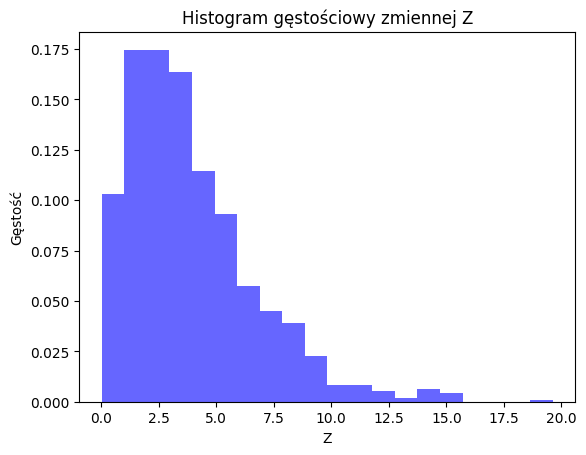

In [ ]:
# Narysuj histogram gęstościowy zmiennej Z
plt.hist(Z, bins=20, density=True, alpha=0.6, color='b')

# Ustawienia osi i tytułu
plt.xlabel('Z')
plt.ylabel('Gęstość')
plt.title('Histogram gęstościowy zmiennej Z')


**Zadanie 8.** Dorysuj do histogramu wykres gęstości rozkładu Gamma(2,2).

*Przydatne funkcje i argumenty*: `scipy.stats.gamma.pdf`


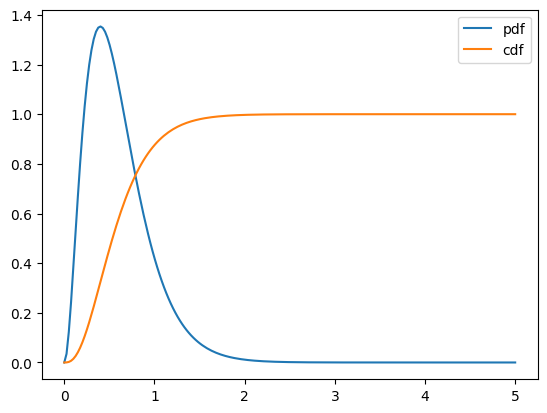

In [ ]:
# Gamma: symulowanie zmiennych losowych, funkcja gęstości, dystrybuanta
# przy użyciu biblioteki scipy.stats:

from scipy.stats import gamma

shape=3
scale=1/5

gamma_samples = gamma.rvs(a=3, scale=scale, size=100) # probka rozm. 100
x=np.linspace(0,5,200)

gamma_pdf = gamma.pdf(x, a=shape, scale=scale)
gamma_cdf = gamma.cdf(x, a=shape, scale=scale)

plt.plot(x,gamma_pdf, label='pdf')
plt.plot(x,gamma_cdf, label='cdf')
plt.legend()
plt.show()


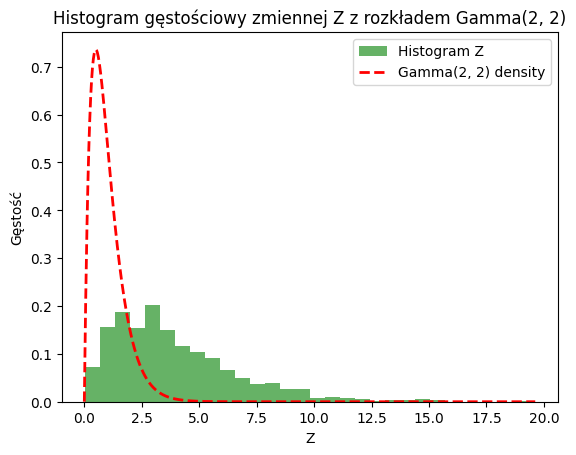

In [ ]:
from scipy.stats import gamma

# Parametry rozkładu Gamma(2, 2)
shape = 2
rate = 2  # rate to lambda, odwrotność scale
scale = 1 / rate

# Narysuj histogram gęstościowy zmiennej Z
plt.hist(Z, bins=30, density=True, alpha=0.6, color='g', label='Histogram Z')

# Zakres wartości dla wykresu gęstości
x = np.linspace(0, np.max(Z), 1000)

# Obliczanie wartości gęstości rozkładu Gamma
gamma_pdf = gamma.pdf(x, a=shape, scale=scale)

# Dorysowanie wykresu gęstości rozkładu Gamma(2,2)
plt.plot(x, gamma_pdf, 'r--', linewidth=2, label='Gamma(2, 2) density')

# Ustawienia osi i tytułu
plt.xlabel('Z')
plt.ylabel('Gęstość')
plt.title('Histogram gęstościowy zmiennej Z z rozkładem Gamma(2, 2)')
plt.legend()

# Wyświetlanie wykresu
plt.show()